## New version of aRchaic (Lindo et al 2016)

We apply the new version of aRchaic that takes into account the strand and strand breaks information. We try to investigate how big a role strand breaks and strand information play in clustering the ancient samples. We start our analysis with John Lindo et al data from moderns and ancients. 

In [33]:
options(warn=-1)
library(aRchaic)
library(CountClust)
library(maptpx)
library(grid)
library(gridBase)

In [5]:
lindo_ancients <- get(load("../processed_data/lindo2016ancients-counts-table-strand-flank.rda"))
lindo_moderns <- get(load("../processed_data/lindo2016moderns-counts-table-strand-flank.rda"))

lindo_moderns_club <- club_signature_counts(lindo_moderns, flanking_bases = 2)
lindo_ancients_club <- club_signature_counts(lindo_ancients, flanking_bases = 2)

In [6]:
pooled_names <- intersect(colnames(lindo_ancients_club),
                          colnames(lindo_moderns_club))

indices1 <- match(pooled_names, colnames(lindo_ancients_club))
indices2 <- match(pooled_names, colnames(lindo_moderns_club))

pooled_dat <- rbind(lindo_ancients_club[, indices1],
                    lindo_moderns_club[, indices2])

filtered_data <- filter_signatures_by_location(pooled_dat, max_pos = 20)
filtered_data_2 <- cbind(filtered_data,  pooled_dat[,(dim(pooled_dat)[2]-7):dim(pooled_dat)[2]])

In [ ]:
leftflank <- grep("left", colnames(filtered_data_2))
rightflank <- grep("right", colnames(filtered_data_2))

signature_set <- colnames(filtered_data)
sig_split <- t(sapply(1:length(signature_set), function(x) return(strsplit(signature_set[x], "")[[1]][1:10])))
new_sig_split <- matrix(0, dim(sig_split)[1], 6);
new_sig_split[,1] <- sig_split[,1]
new_sig_split[,2] <- sig_split[,2]
new_sig_split[,3] <- sapply(1:length(signature_set), function(x) return(paste(sig_split[x,3:6], collapse="")))
new_sig_split[,4] <- sig_split[,7]
new_sig_split[,5] <- sig_split[,8]
new_sig_split[,6] <- sig_split[,10]
#indices_notCtoA <-  which(new_sig_split[,3] != "C->T")
#pooled_data <- pooled_data[, indices_notCtoA]

levels(new_sig_split[,1]) <- c("0", "1", "2", "3", "4")

pos <- t(sapply(1:length(signature_set), function(x)
{
  y = strsplit(signature_set[x], "")[[1]]
  return(paste(y[12:length(y)], collapse=""))
}))



mat <- matrix(0, dim(new_sig_split)[1], dim(new_sig_split)[2])
for(k in 1:dim(new_sig_split)[2]){
  temp <- as.factor(new_sig_split[,k])
  mat[,k] <- as.numeric(as.matrix(plyr::mapvalues(temp, from = levels(temp), to = 0:(length(levels(temp))-1))))
}

pos <- as.numeric(pos)
pos <- pos - min(pos)
pos <- factor(pos, levels = 0:20)

signatures <- mat;
signature_pos <- cbind.data.frame(signatures, pos)


library(maptpx)
topic_clus <- topics(filtered_data_2, K=10, type = "independent",
                     signatures = signature_pos,
                     ind_model_indices = setdiff(1:dim(filtered_data_2)[2],c(leftflank, rightflank)),
                     tol=0.1)

In [7]:
topic_clus_2 <- get(load(file="../processed_data/maptpx-runs/lindo2016_maptpx_full_K10_strand_break.rda"))

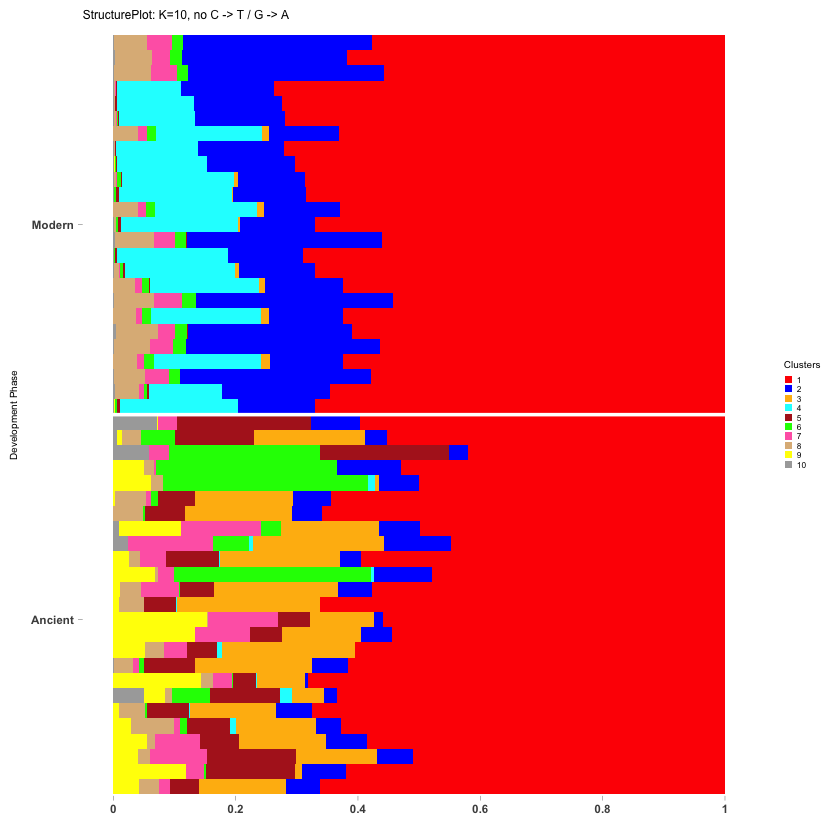

In [9]:
labs <- c(rep("Ancient",25), rep("Modern",25))

omega <- topic_clus_2$omega

annotation <- data.frame(
  sample_id = paste0("X", c(1:NROW(omega))),
  tissue_label = factor(labs)
)

cols1 <- c("red","blue","darkgoldenrod1","cyan","firebrick", "green",
           "hotpink","burlywood","yellow","darkgray","deepskyblue","darkkhaki",
           "brown4","darkorchid","magenta","yellow", "azure1","azure4")

rownames(omega) <- annotation$sample_id;
CountClust::StructureGGplot(omega = omega,
                            annotation = annotation,
                            palette = cols1,
                            yaxis_label = "Development Phase",
                            order_sample = FALSE,
                            figure_title = paste0("StructurePlot: K=", dim(omega)[2],", no C -> T / G -> A"),
                            axis_tick = list(axis_ticks_length = .1,
                                             axis_ticks_lwd_y = .1,
                                             axis_ticks_lwd_x = .1,
                                             axis_label_size = 7,
                                             axis_label_face = "bold"))

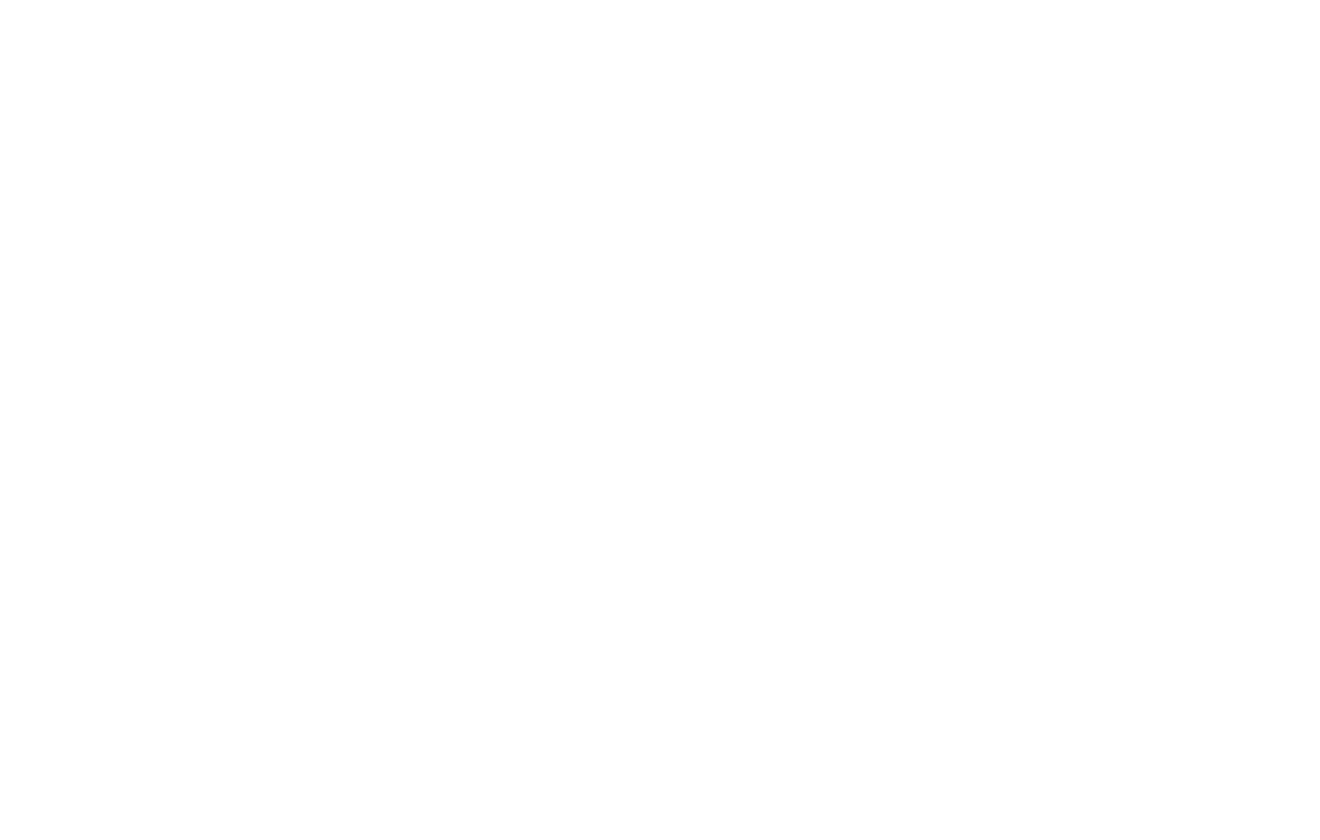

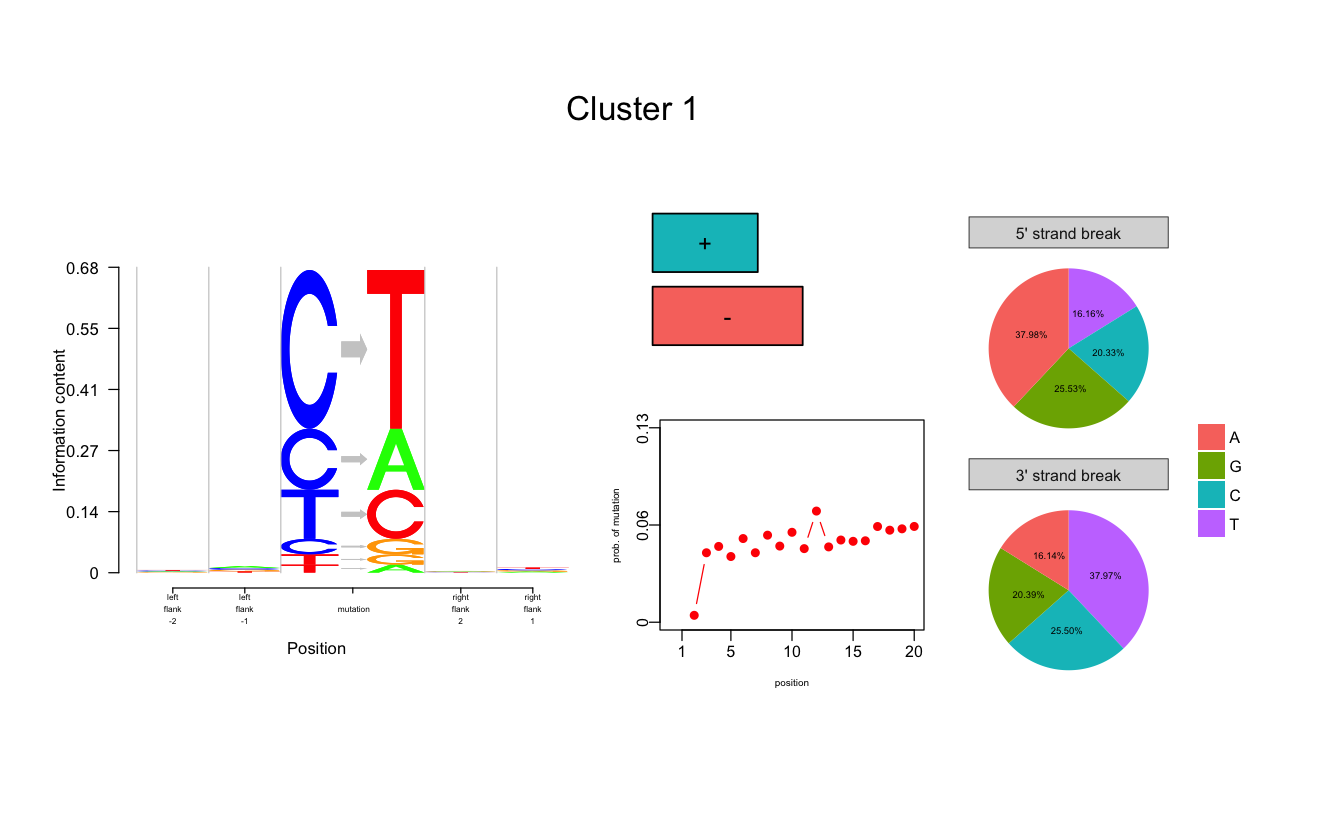

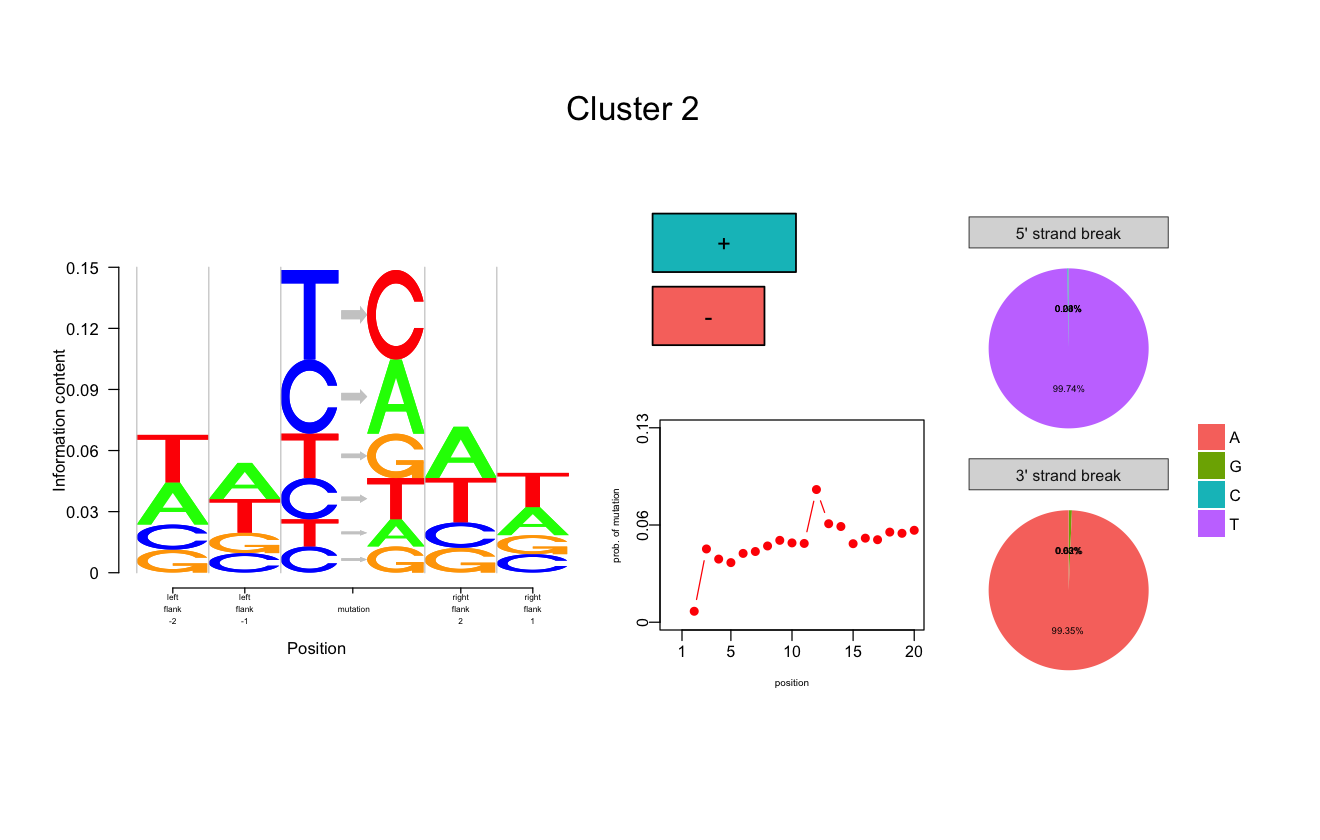

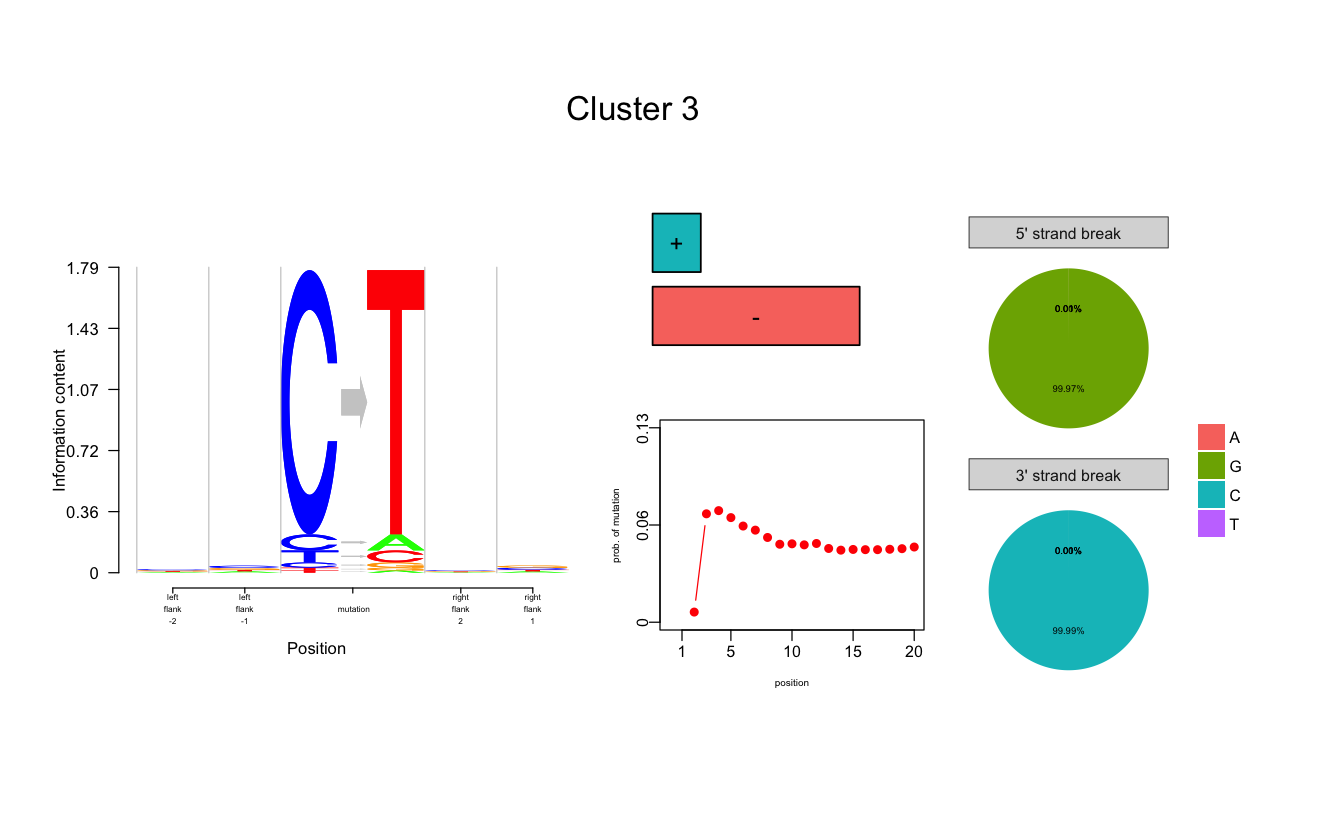

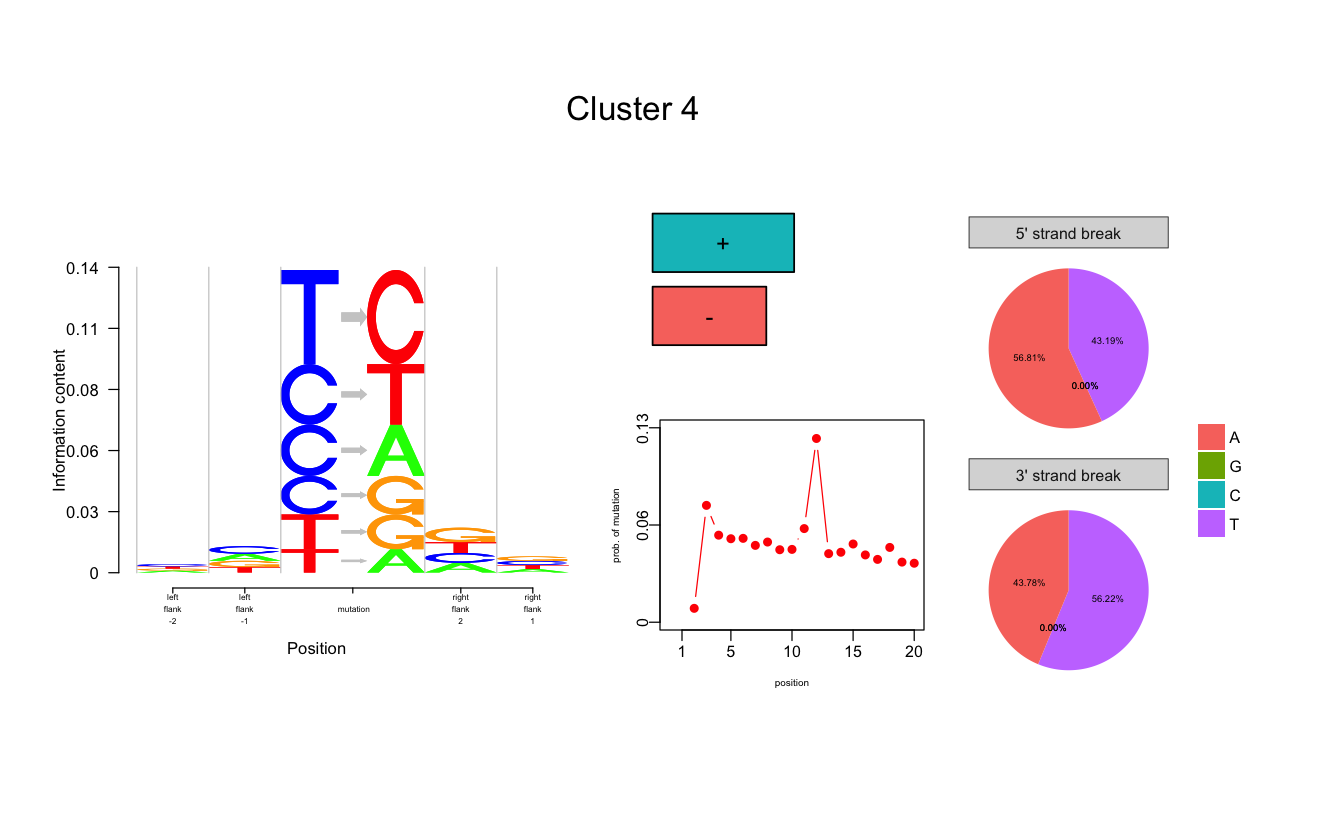

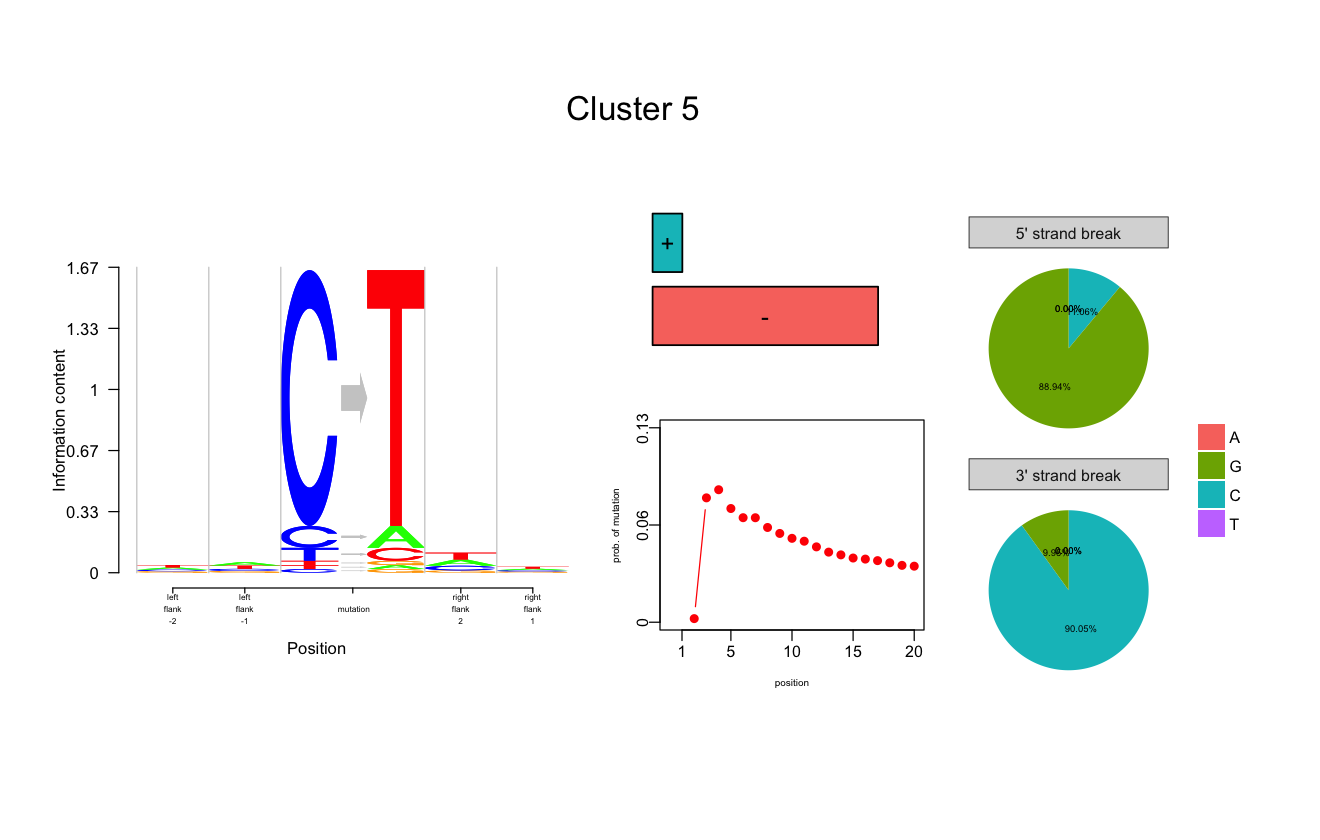

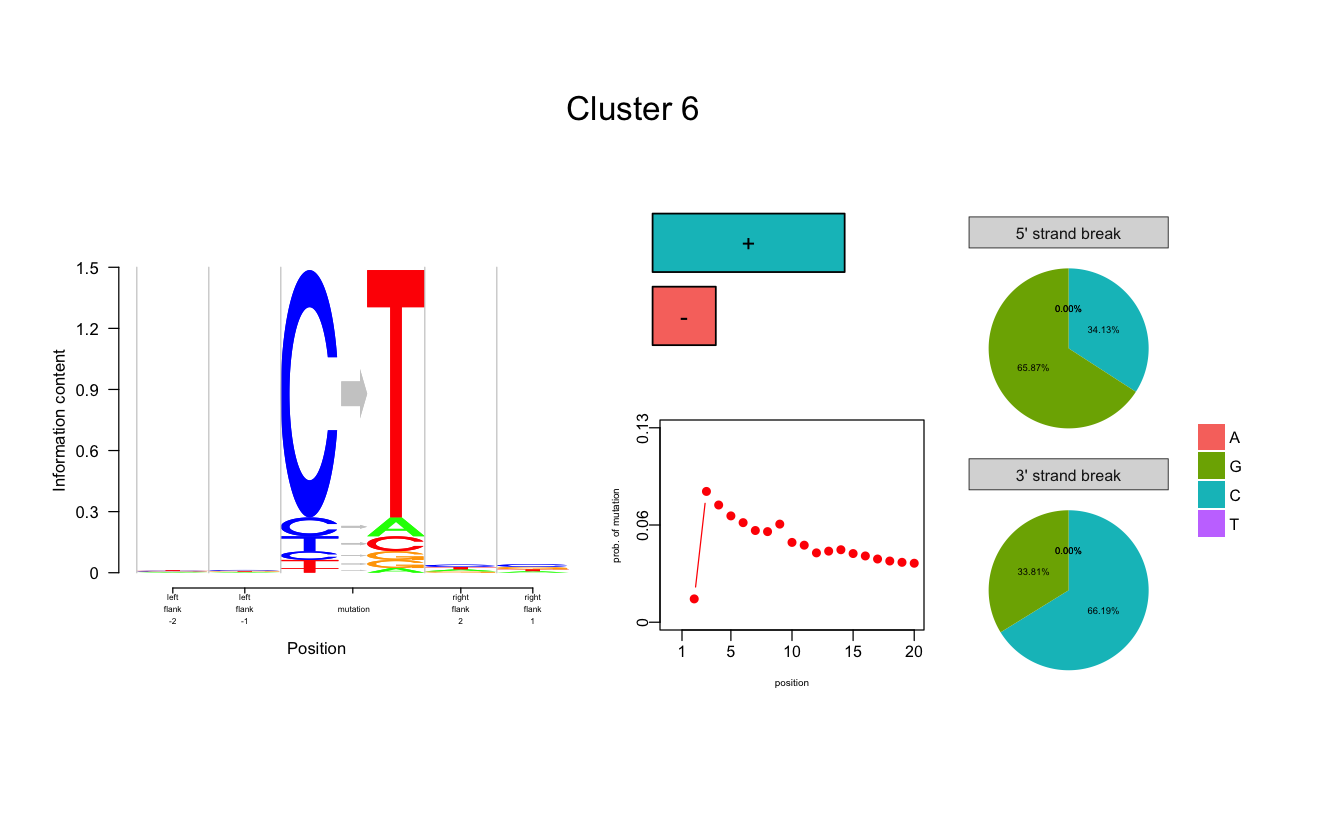

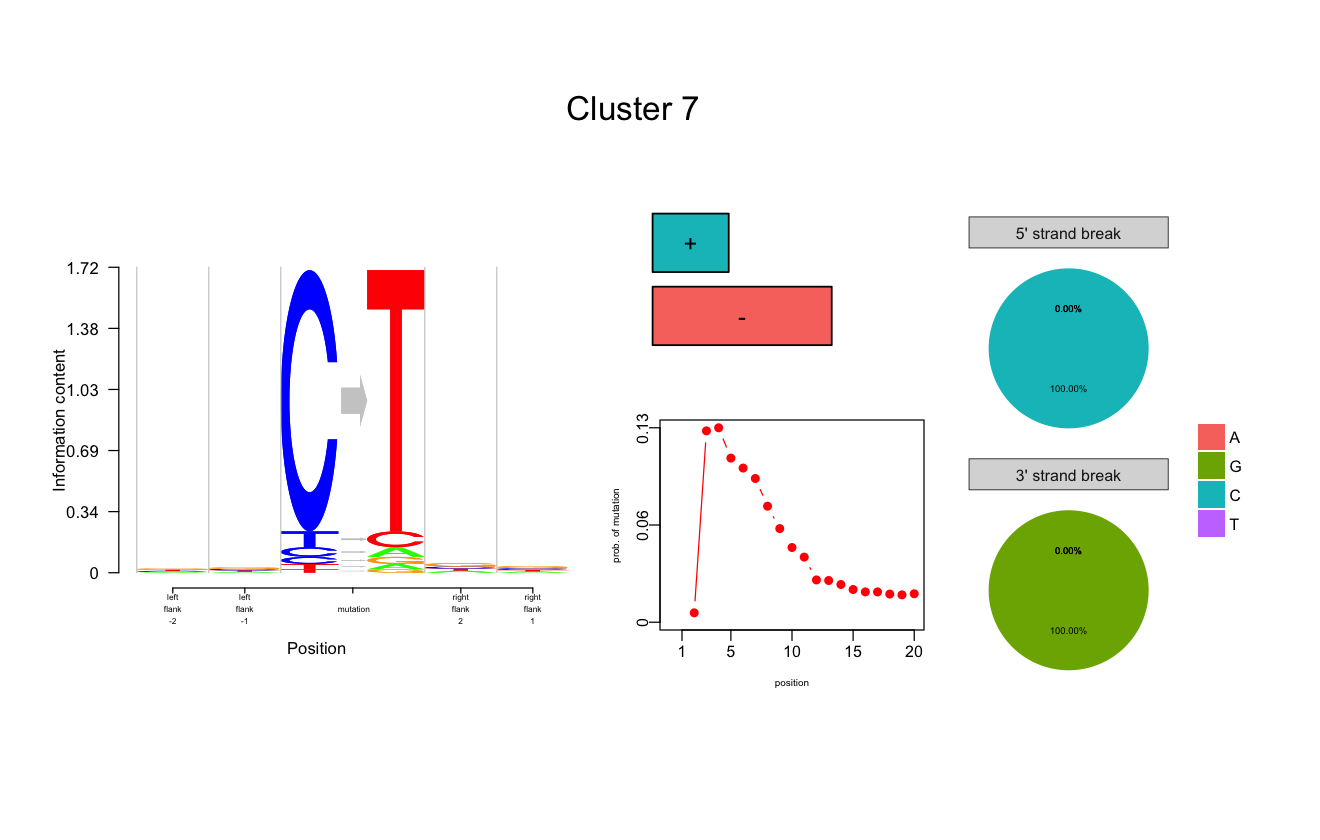

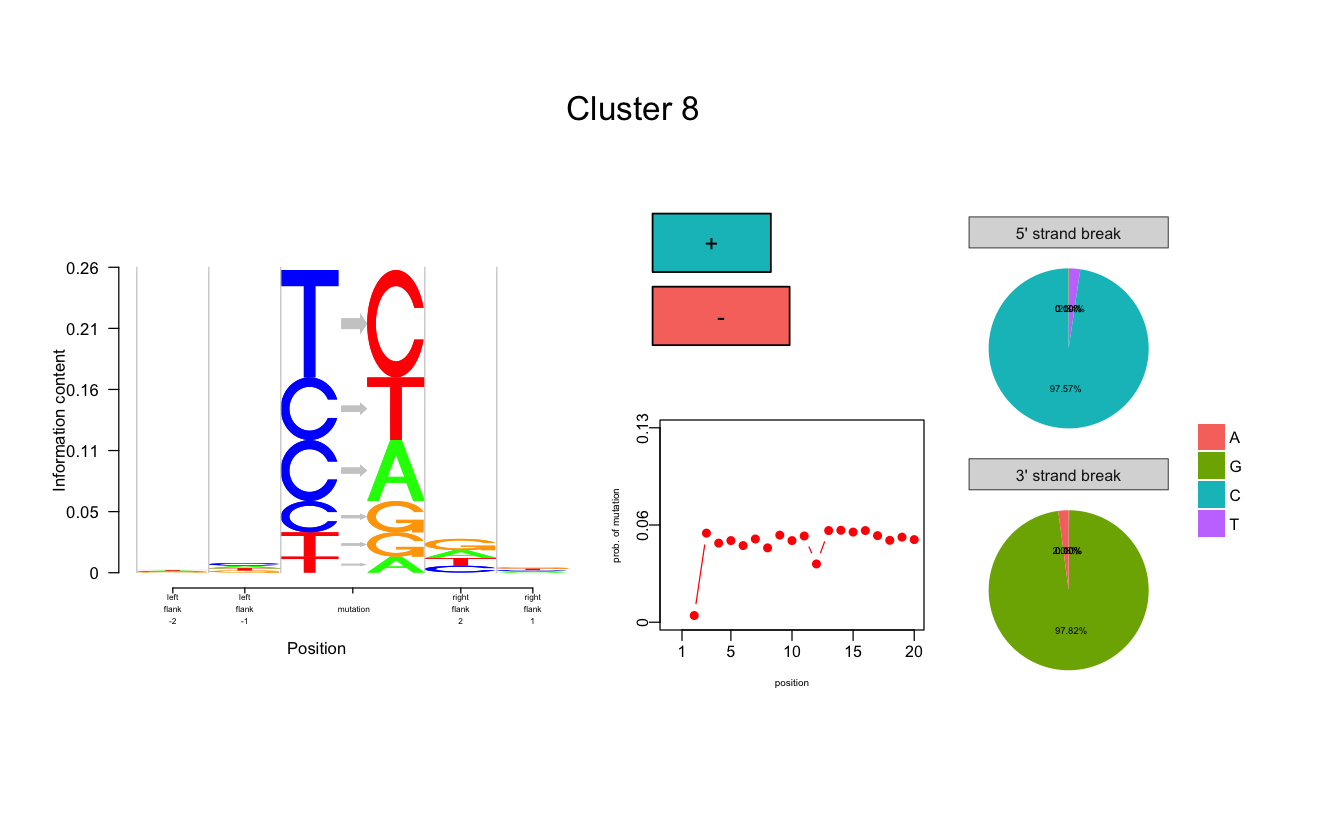

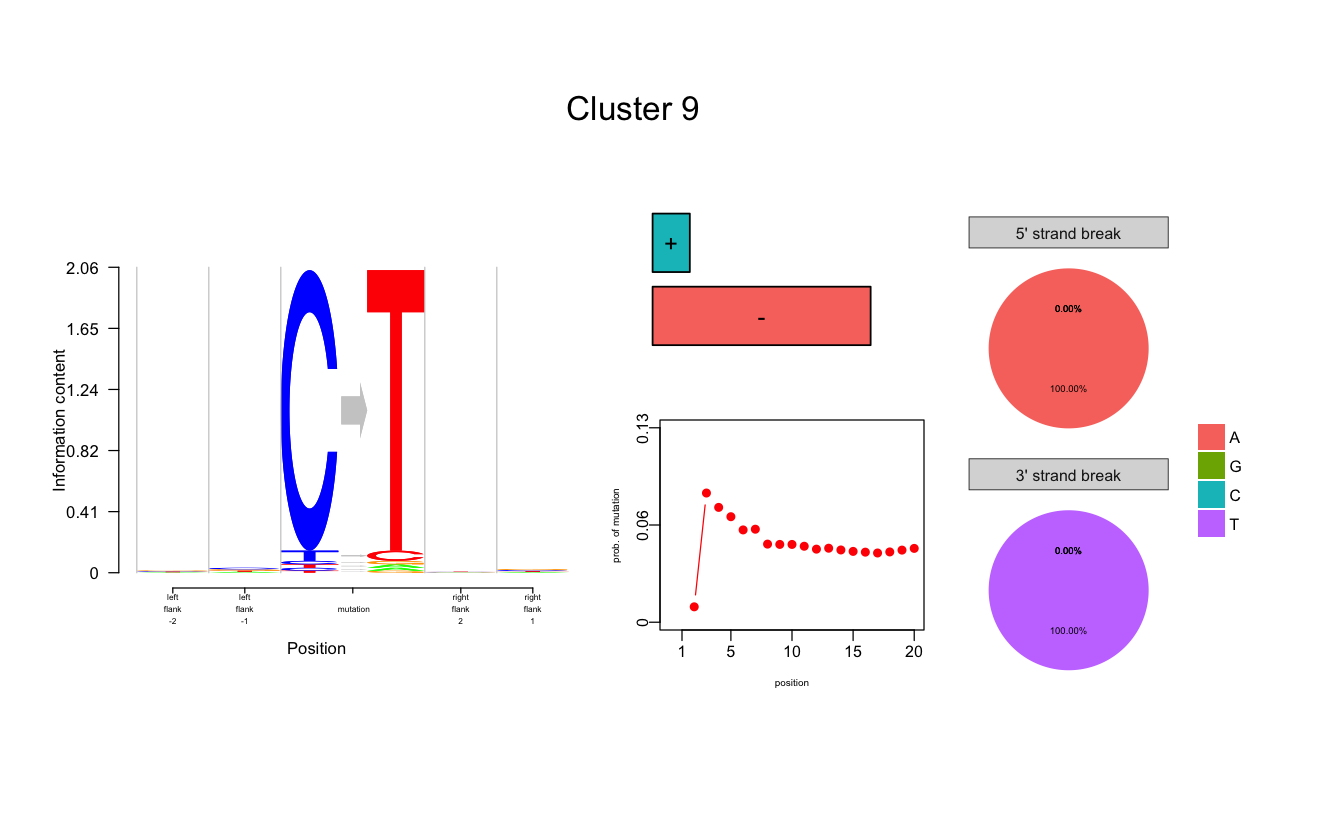

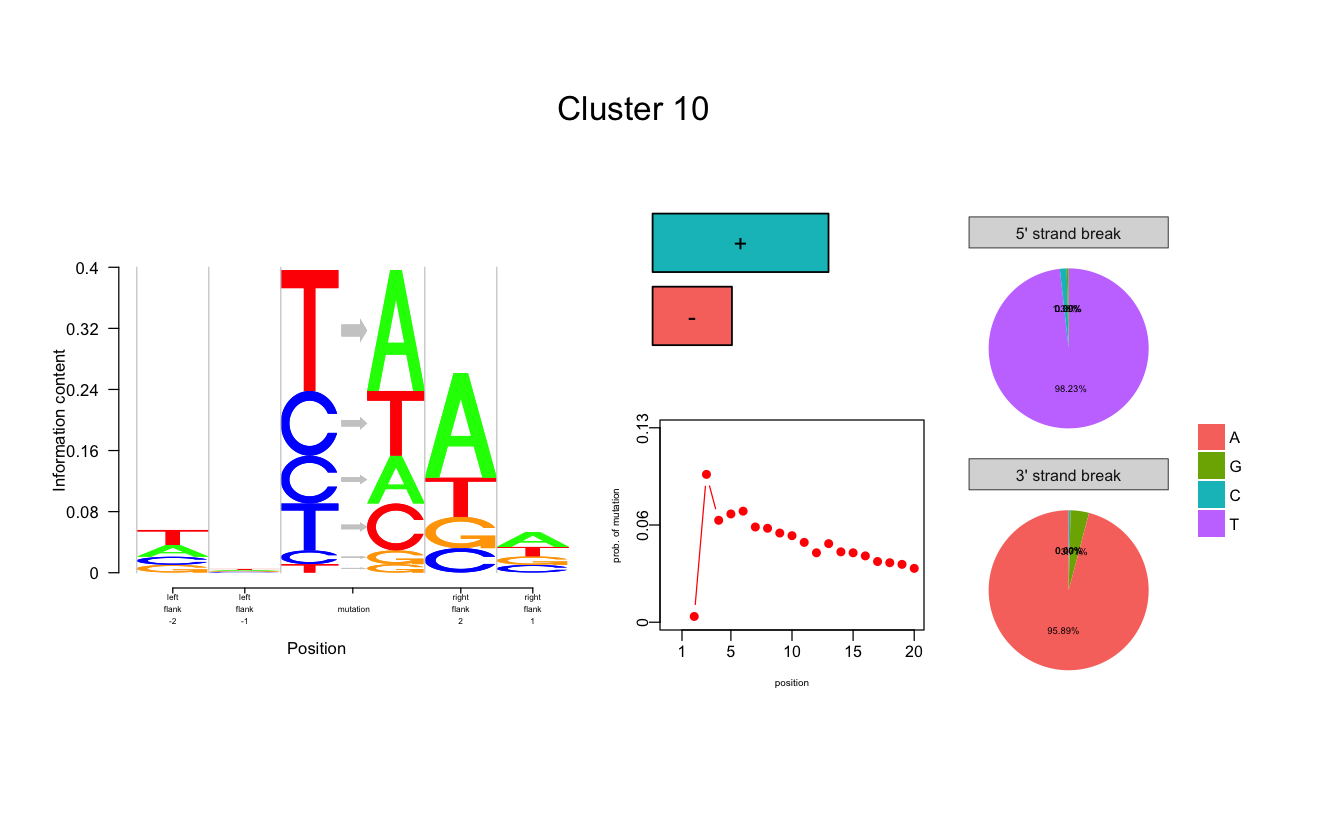

In [37]:
options(repr.plot.width=11, repr.plot.height=7)
plot.new()
damageLogo_pos_str(topic_clus_2$theta)

In [35]:
sessionInfo()

R version 3.3.1 (2016-06-21)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: OS X 10.12 (Sierra)

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] aRchaic_0.99.0   dplyr_0.5-1      gridBase_0.4-7   maptpx_1.9-3    
[5] CountClust_0.1.2 ggplot2_2.2.1   

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.2-5         gtools_3.5.0         modeltools_0.2-21   
 [4] slam_0.1-40          repr_0.10            reshape2_1.4.2.9000 
 [7] lattice_0.20-34      colorspace_1.3-1     stats4_3.3.1        
[10] mgcv_1.8-16          withr_1.0.2          DBI_0.5-1           
[13] uuid_0.1-2           plyr_1.8.4           stringr_1.1.0       
[16] munsell_0.4.3        gtable_0.2.0         devtools_1.12.0     
[19] memoise_1.0.0        evaluate_0.10        labeling_0.3        
[22] knitr_1.15.1         permute_0.9-4        